In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import itertools

In [51]:
dir(load_iris())

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [52]:
data=pd.DataFrame(load_iris().data,columns=load_iris().feature_names)

In [53]:
features=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

In [54]:
x=data[features]

In [55]:
load_iris().target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [56]:
data['target']=load_iris().target

In [57]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [58]:
y=data['target']

In [59]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=1/3, random_state=0)

In [60]:
len(train_x)==len(train_y)

True

In [61]:
dec=DecisionTreeRegressor()

In [62]:
dec.fit(train_x,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [49]:
pred=dec.predict(test_x)

In [64]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [67]:
cm = confusion_matrix(test_y,pred)

In [68]:
cm

array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 14]], dtype=int64)

Confusion matrix, without normalization
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


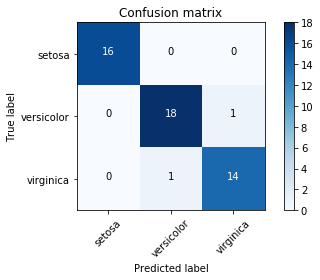

In [69]:
plot_confusion_matrix(cm,classes=load_iris().target_names)

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(test_y,pred)

0.96

In [80]:
dataset=pd.read_csv('social-network-ads\Social_Network_Ads.csv')

In [93]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [128]:
features=['EstimatedSalary','Age']

In [145]:
x=dataset[features]

In [130]:
x.shape

(400, 2)

In [147]:
y=dataset['Purchased']

In [148]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=1/3, random_state=0)

In [149]:
len(train_x)==len(train_y)

True

In [164]:
from sklearn.neighbors import KNeighborsClassifier
reg=KNeighborsClassifier(n_neighbors=3)

In [165]:
data.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
dtype: bool

In [166]:
reg.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [167]:
pred=reg.predict(test_x)

In [168]:
accuracy_score(test_y,pred)

0.7686567164179104

0.3325094059163063